<a href="https://colab.research.google.com/github/nthammadi-uncc/applied-machine-learning/blob/main/SVM%20&%20Decision%20Trees%20/muffin_vs_cupcake_vs_scone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>**Classifying Muffins, Cupcakes and Scones with SVM and Decision Trees**

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

__Step 2:__ Import Data

In [2]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes_scones.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


__Step 3:__ Prepare the Data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


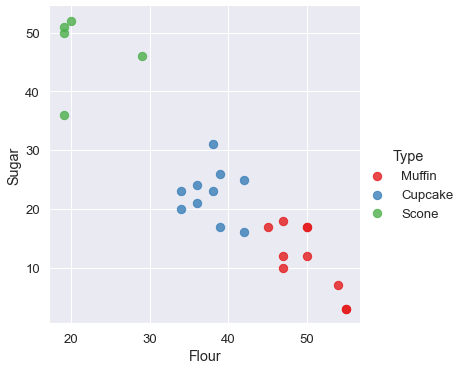

In [3]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


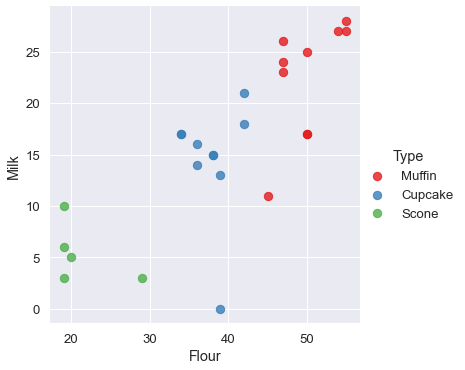

In [4]:
# Plot an additional ingredient-Milk
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

#### The ingredient - Milk has some overlapping. So we cannot draw clear decision lines just by looking at it as compared with ingredient - Sugar

In [5]:
from sklearn import preprocessing

In [6]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].values
type_label = preprocessing.LabelEncoder()
type_label.fit(recipes['Type'].values)
#np.select([recipes['Type']=='Muffin',recipes['Type']=='Cupcake',recipes['Type']=='Scone'], [0,1,2])

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

__Step 4:__ Fit the Model

In [7]:
# Fit the SVM model
model = svm.SVC(kernel='linear', decision_function_shape='ovo',random_state=42)
model.fit(ingredients, type_label.transform(recipes['Type'].values))

SVC(decision_function_shape='ovo', kernel='linear', random_state=42)

In [8]:
model.coef_, model.support_vectors_, model.intercept_

(array([[-6.66537262e-01,  4.85266891e-05],
        [ 8.33467927e-02, -8.33467927e-02],
        [ 4.44404465e-02, -4.44499153e-02]]),
 array([[42., 16.],
        [42., 25.],
        [38., 31.],
        [45., 17.],
        [29., 46.],
        [19., 36.]]),
 array([28.99349742,  0.4167878 , -0.24413997]))

__Step 5:__ Visualize Results

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

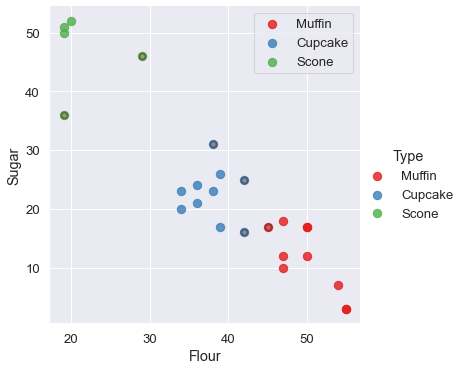

In [9]:
#visualizing the support vectors
support_vector_df = pd.DataFrame(model.support_vectors_, columns=["Flour", "Sugar"])
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
sns.scatterplot(support_vector_df["Flour"], support_vector_df["Sugar"],alpha=0.4,linewidth=2,edgecolor="k").plot()

The formula for the hyperplane is:
f(x) =W₀x + W₁y + b, where W₀ and W₁ are the weights of vectors and b is the bias.

In [10]:
print(f"Vector of weights (w) =  {model.coef_[0]}")
print(f"b = {model.intercept_[0]}")
print(f"Indices of support vectors = {model.support_}")
print(f"Support vectors =  {model.support_vectors_}") 
print(f"Number of support vectors for each class = {model.n_support_}") 
print(f"Coefficients of the support vector in the decision function = {np.abs(model.dual_coef_)}") 

Vector of weights (w) =  [-6.66537262e-01  4.85266891e-05]
b = 28.993497423663204
Indices of support vectors = [11 15 17  3 20 21]
Support vectors =  [[42. 16.]
 [42. 25.]
 [38. 31.]
 [45. 17.]
 [29. 46.]
 [19. 36.]]
Number of support vectors for each class = [3 1 2]
Coefficients of the support vector in the decision function = [[0.19748713 0.02469196 0.         0.22217909 0.0048619  0.00208367]
 [0.         0.         0.00694557 0.00197534 0.00069184 0.0012835 ]]


To plot the hyperplane, you must assign an identifier to the weight of the vectors and find the slope of the hyperplane. The hyperplane intercepts the x-axis at (-b/W₀,0) and the y-axis at (0,-b/W₁). Therefore for the slope, you will obtain -(W₀/W₁)

In [11]:
# get the values for weights, slope and bias to calculate hyperplane between Muffine and cupcake
w = model.coef_[0]
slope = -w[0] / w[1]
b=model.intercept_[0]
xx = np.linspace(20, 60)
yy = slope * xx - (b / w[1])

In [12]:
#plotting the margins
sup1 = model.support_vectors_[0] 
yy_below = slope * xx + (sup1[1] - slope * sup1[0])

# last support vector
sup2 = model.support_vectors_[3]
yy_above = slope * xx + (sup2[1] - slope * sup2[0])


In [13]:
# get the values for weights, slope and bias to calculate hyperplane between cupcake and scone
w1 = model.coef_[1]
slope1 = -w1[0] / w1[1]
b1=model.intercept_[1]
xx1 = np.linspace(0, 60)
yy1 = slope1 * xx1 - (b1 / w1[1])

In [14]:
#plotting the margins
sup3 = model.support_vectors_[2] 
yy_below1 = slope1 * xx1 + (sup3[1] - slope1 * sup3[0])

# last support vector
sup4 = model.support_vectors_[4]
yy_above1 = slope1 * xx1 + (sup4[1] - slope1 * sup4[0])


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


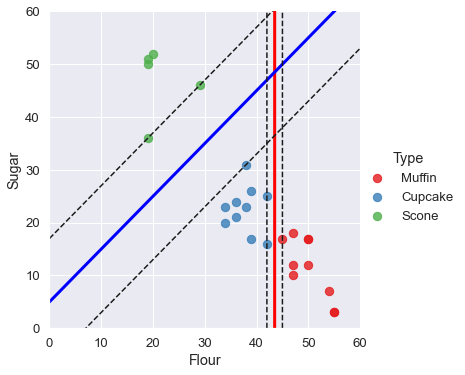

In [15]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.axis([0,60,0,60]);

#plotting the hyperlanes 
plt.plot(xx, yy, linewidth = 3, color = 'red') 
plt.plot(xx1, yy1, linewidth = 3, color = 'blue') 
#plotting the two marginss 
plt.plot(xx, yy_below, 'k--') 
plt.plot(xx, yy_above, 'k--')
plt.plot(xx1, yy_below1, 'k--') 
plt.plot(xx1, yy_above1, 'k--')

__Step 6:__ Predict New Case

In [16]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake_or_scone(flour, sugar):
    recipe_name=type_label.inverse_transform(model.predict([[flour,sugar]]))
    print('You\'re looking at a ' + recipe_name + ' recipe!')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


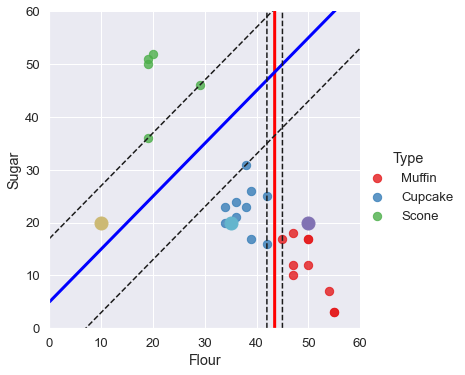

In [17]:
#replot the scatterplot with new values
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.axis([0,60,0,60]);

#plotting the hyperlanes 
plt.plot(xx, yy, linewidth = 3, color = 'red') 
plt.plot(xx1, yy1, linewidth = 3, color = 'blue') 

#plotting the two marginss 
plt.plot(xx, yy_below, 'k--') 
plt.plot(xx, yy_above, 'k--')
plt.plot(xx1, yy_below1, 'k--') 
plt.plot(xx1, yy_above1, 'k--')

#plot additional point to visualize their class
plt.plot(50, 20, 'mo', markersize='13'); ## -- Muffin
plt.plot(35, 20, 'co', markersize='13'); ## -- Cupcake
plt.plot(10, 20, 'yo', markersize='13'); ## -- Scone

In [18]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake_or_scone(50, 20)

["You're looking at a Muffin recipe!"]


In [19]:
# Predict if 35 parts flour and 20 parts sugar
muffin_or_cupcake_or_scone(35, 20)

["You're looking at a Cupcake recipe!"]


In [20]:
# Predict if 10 parts flour and 20 parts sugar
muffin_or_cupcake_or_scone(10, 20)

["You're looking at a Scone recipe!"]


In [21]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [22]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(decision_function_shape='ovo', kernel='linear', random_state=42),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [23]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [24]:
# S = String
pickle.dumps(muffin_cupcake_dict)

b'\x80\x04\x95\x0f\x06\x00\x00\x00\x00\x00\x00}\x94(\x8c\x14muffin_cupcake_model\x94\x8c\x14sklearn.svm._classes\x94\x8c\x03SVC\x94\x93\x94)\x81\x94}\x94(\x8c\x17decision_function_shape\x94\x8c\x03ovo\x94\x8c\nbreak_ties\x94\x89\x8c\x06kernel\x94\x8c\x06linear\x94\x8c\x06degree\x94K\x03\x8c\x05gamma\x94\x8c\x05scale\x94\x8c\x05coef0\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x03tol\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\x02nu\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x07epsilon\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\tshrinking\x94\x88\x8c\x0bprobability\x94\x89\x8c\ncache_size\x94K\xc8\x8c\x0cclass_weight\x94N\x8c\x07verbose\x94\x89\x8c\x08max_iter\x94J\xff\xff\xff\xff\x8c\x0crandom_state\x94K*\x8c\x07_sparse\x94\x89\x8c\x0en_features_in_\x94K\x02\x8c\rclass_weight_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x03\x85\x94h!\x8c\x05dtype\x94\x93\

## Creating a Decision tree with the same dataset

In [25]:
from sklearn.tree import DecisionTreeClassifier
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [26]:
X_ingredients = recipes[['Flour', 'Sugar']].values
y_mcs = recipes[['Type']].values
X_ingredients,y_mcs

(array([[55,  3],
        [47, 12],
        [47, 18],
        [45, 17],
        [50, 12],
        [55,  3],
        [54,  7],
        [47, 10],
        [50, 17],
        [50, 17],
        [39, 26],
        [42, 16],
        [34, 20],
        [39, 17],
        [38, 23],
        [42, 25],
        [36, 21],
        [38, 31],
        [36, 24],
        [34, 23],
        [29, 46],
        [19, 36],
        [20, 52],
        [19, 50],
        [19, 51]]),
 array([['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Muffin'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Cupcake'],
        ['Scone'],
        ['Scone'],
        ['Scone'],
        ['Scone'],
        ['Scone']], dtype=object))

In [27]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_ingredients,y_mcs)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [28]:
recipes['Type'].unique()

array(['Muffin', 'Cupcake', 'Scone'], dtype=object)

In [29]:
main_features=recipes.columns.values[1:].tolist()[0:3]
main_features

['Flour', 'Milk', 'Sugar']

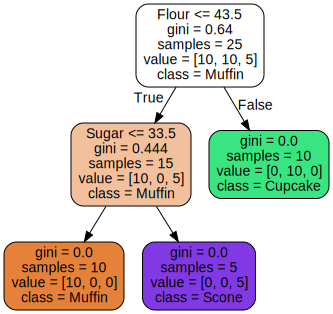

In [30]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "muffic_cupcake_scone_tree.dot"),
        feature_names=muffin_cupcake_dict['muffin_cupcake_features'],
        class_names=recipes['Type'].unique(),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "muffic_cupcake_scone_tree.dot"))

## Predicting class probabilities

In [31]:
tree_clf.predict_proba([[40, 34]])

array([[0., 0., 1.]])